In [26]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [29]:
#questão 1

def eqfoguete(t, u, Mo, c, g):
  """
    t: Tempo em segundos.
    u: Velocidade de exaustão.
    Mo: Massa inicial do foguete.
    c: Taxa de consumo de combustível.
    g: Aceleração da gravidade.
 """
  return u * np.log(Mo / (Mo - c * t)) + g * t - 100

def bissecao(a, b, tol, u, Mo, c, g):
    
  """
    u, Mo, c, g: Parâmetros da função do foguete.
  """
  resultados = []
  while (b - a) / 2 > tol:
    c = (a + b) / 2
    fa = eqfoguete(a, u, Mo, c, g)
    fc = eqfoguete(c, u, Mo, c, g)
    erro_relativo = abs((b - a) / b)

    resultados.append([a, b, c, fc, erro_relativo]) #armazena para colocar no dataframe depois

    if fa * fc < 0:
      b = c
    else:
      a = c

  return resultados

# Dados
u = 200
Mo = 1600
c = 27
g = 9.8
a = 6
b = 8
tolerancia = 0.00008

resultados = bissecao(a, b, tolerancia, u, Mo, c, g)
questao_um = pd.DataFrame(resultados, columns=['a', 'b', 'c', 'f(c)', 'Erro Relativo'])

In [31]:
questao_um

,a,b,c,f(c),Erro Relativo
0,6.000000,8,7.000000,-25.179251,0.250000
1,7.000000,8,7.500000,-19.342178,0.125000
2,7.500000,8,7.750000,-16.397640,0.062500
3,7.750000,8,7.875000,-14.918816,0.031250
4,7.875000,8,7.937500,-14.177759,0.015625
5,7.937500,8,7.968750,-13.806818,0.007812
6,7.968750,8,7.984375,-13.621244,0.003906
7,7.984375,8,7.992188,-13.528431,0.001953
8,7.992188,8,7.996094,-13.482018,0.000977
9,7.996094,8,7.998047,-13.458810,0.000488


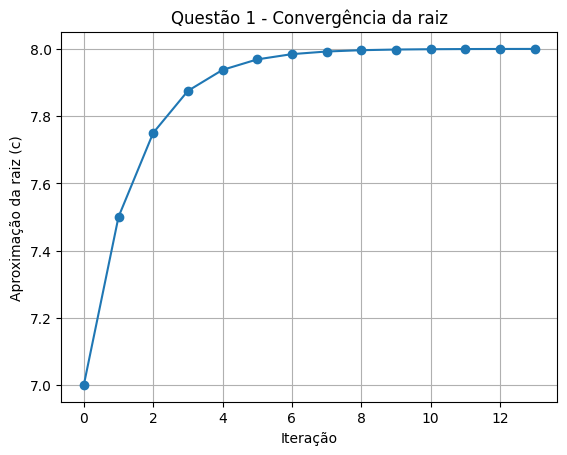

In [37]:
plt.plot(questao_um['c'], marker='o')
plt.xlabel('Iteração')
plt.ylabel('Aproximação da raiz (c)')
plt.title('Questão 1 - Convergência da raiz')
plt.grid(True)
plt.show()

In [4]:
questao_um

,a,b,c,f(c),Erro Relativo
0,6.00000,8,7.000000,-25.179251,0.250000
1,7.00000,8,7.500000,-19.342178,0.125000
2,7.50000,8,7.750000,-16.397640,0.062500
3,7.75000,8,7.875000,-14.918816,0.031250
4,7.87500,8,7.937500,-14.177759,0.015625
5,7.93750,8,7.968750,-13.806818,0.007812
6,7.96875,8,7.984375,-13.621244,0.003906


In [43]:
#questao 2

def eqtensao(T, a, L, S):
    """
    T: Tensão no cabo.
    a: Constante relacionada ao peso do cabo.
    L: Distância entre os postes.
    S: Comprimento total do cabo.
    """
    return (2*T/a) * np.sinh(a*L/(2*T)) - S  #np.sinh seno hiperbólico

def bissecao(a, b, tol, max_iter, eqtensao, *args):
  """
    max_iter: Número máximo de iterações.
    eqtensao: Função a ser resolvida.
    *args: Argumentos a mais para formula.
  """

  resultados = []
  for i in range(max_iter):
    c = (a + b) / 2
    f_c = eqtensao(c, *args)

    resultados.append([i+1, a, b, c, f_c, abs(f_c/c) if c != 0 else 0])

    if abs(f_c) < tol:
      return c, pd.DataFrame(resultados, columns=['Iteração', 'a', 'b', 'c', 'f(c)', 'Erro Relativo'])

    if np.sign(f_c) == np.sign(eqtensao(a, *args)):
      a = c
    else:
      b = c

  print("Número máximo de iterações atingido.")
  return c, pd.DataFrame(resultados, columns=['Iteração', 'a', 'b', 'c', 'f(c)', 'Erro Relativo']) #armazenando no dataframe

# Dados do problema
S = 32
L = 30
a = 0.1
intervalo = [2, 3]
tolerancia = 0.0001 
max_iter = 100

# Resolvendo o problema
raiz, questao_dois = bissecao(intervalo[0], intervalo[1], tolerancia, max_iter, eqtensao, a, L, S)

print("A tensão no meio do cabo é aproximadamente:", raiz, "kgf")


A tensão no meio do cabo é aproximadamente: 2.39501953125 kgf


In [44]:
questao_dois

,Iteração,a,b,c,f(c),Erro Relativo
0,1,2.000000,3.000000,2.500000,-0.167321,0.066928
1,2,2.000000,2.500000,2.250000,0.272131,0.120947
2,3,2.250000,2.500000,2.375000,0.034618,0.014576
3,4,2.375000,2.500000,2.437500,-0.070331,0.028854
4,5,2.375000,2.437500,2.406250,-0.018905,0.007856
5,6,2.375000,2.406250,2.390625,0.007588,0.003174
6,7,2.390625,2.406250,2.398438,-0.005725,0.002387
7,8,2.390625,2.398438,2.394531,0.000915,0.000382
8,9,2.394531,2.398438,2.396484,-0.002409,0.001005
9,10,2.394531,2.396484,2.395508,-0.000748,0.000312


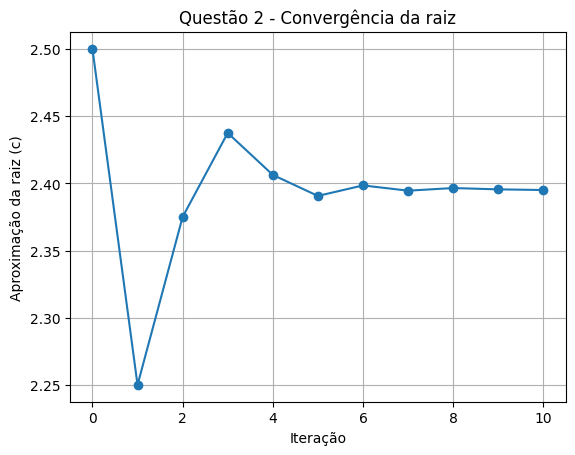

In [45]:
plt.plot(questao_dois['c'], marker='o')
plt.xlabel('Iteração')
plt.ylabel('Aproximação da raiz (c)')
plt.title('Questão 2 - Convergência da raiz')
plt.grid(True)
plt.show()

In [15]:
#questao 4

def carga_capacitor(R, L=5, C=1e-4, t=0.1, q0=1):
    return q0 * np.exp(-R * t / (2 * L)) * np.cos(np.sqrt(1 / (L * C) - (R / (2 * L)) ** 2) * t) - q0 / 3

def bisseccao(f, a, b, tol):
    iteracoes = 0
    erro_relativo = float('inf') #infinito
    tabela_iteracoes = []

    while erro_relativo > tol:
        iteracoes += 1
        c = (a + b) / 2.0
        if f(c) == 0 or (b - a) / 2.0 < tol:
            break
        if np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
        erro_relativo = abs((b - a) / a)

        tabela_iteracoes.append({
            'Iteração': iteracoes,
            'a': a,
            'b': b,
            'c': c,
            'f(c)': f(c),
            'Erro Relativo': erro_relativo
        })
    
    df = pd.DataFrame(tabela_iteracoes)
    return c, df

# Intervalo inicial [0, 10] e tolerância de 1%
raiz, questao_quatro = bisseccao(lambda R: carga_capacitor(R, L=5, C=1e-4, t=0.1, q0=1), 0, 10, 0.0001)
print(f"A resistência R encontrada é R = {raiz:.5f}")

A resistência R encontrada é R = 9.99939


In [16]:
questao_quatro

,Iteração,a,b,c,f(c),Erro Relativo
0,1,5.000000,10,5.000000,-0.559935,1.000000
1,2,7.500000,10,7.500000,-0.554655,0.333333
2,3,8.750000,10,8.750000,-0.552108,0.142857
3,4,9.375000,10,9.375000,-0.550857,0.066667
4,5,9.687500,10,9.687500,-0.550237,0.032258
5,6,9.843750,10,9.843750,-0.549928,0.015873
6,7,9.921875,10,9.921875,-0.549774,0.007874
7,8,9.960938,10,9.960938,-0.549697,0.003922
8,9,9.980469,10,9.980469,-0.549659,0.001957
9,10,9.990234,10,9.990234,-0.549640,0.000978


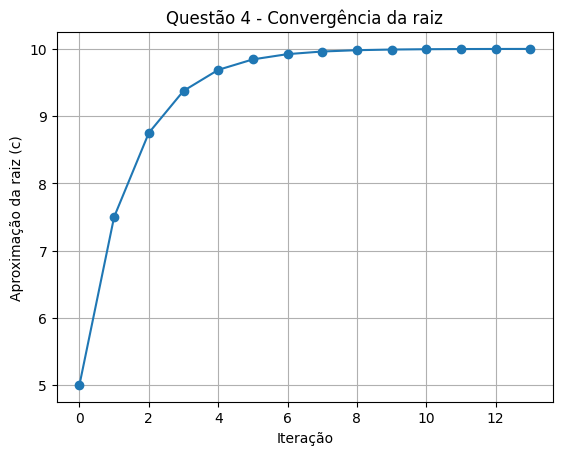

In [39]:
plt.plot(questao_quatro['c'], marker='o')
plt.xlabel('Iteração')
plt.ylabel('Aproximação da raiz (c)')
plt.title('Questão 4 - Convergência da raiz')
plt.grid(True)
plt.show()